In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
sns.set_theme(style="whitegrid")

import numpy as np
from scipy.stats import norm, \
    beta, cauchy, expon, rayleigh, uniform, multivariate_t, t
import pandas as pd
from scipy.optimize import brentq

### Gaussian Copula

$$ C_R(u,v) = \Phi_R(\Phi^{-1}(u), \Phi^{-1}(v)) $$

In [3]:
# https://documentation.sas.com/doc/en/etsug/15.2/etsug_copula_details03.htm
r = 0.8
P = np.asarray([
    [1, r],
    [r, 1]
])
d = P.shape[0]
n = 500

A = np.linalg.cholesky(P)
Z = np.random.normal(size=(n,d))
U_Gauss = norm.cdf(np.matmul(Z, A))

<IPython.core.display.Javascript object>


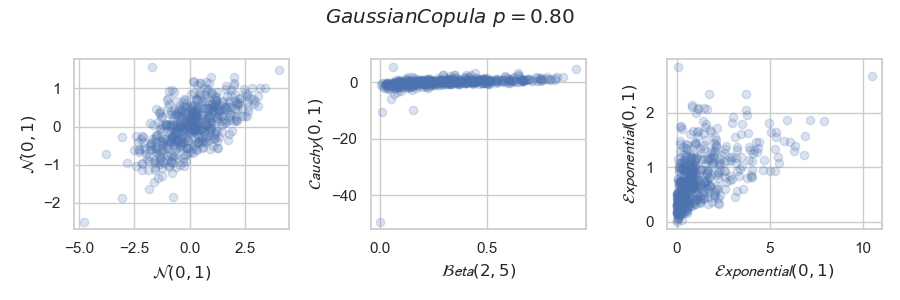

In [4]:
H1 = np.empty_like(U_Gauss)
H1[:,0] = norm.ppf(U_Gauss[:,0]); H1[:,1] = norm.ppf(U_Gauss[:,1]); 

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.scatter(H1[:,0], H1[:,1], alpha=0.2)
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')

H2 = np.empty_like(U_Gauss)
H2[:,0] = beta.ppf(U_Gauss[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_Gauss[:,1]); 

plt.subplot(1,3,2)
plt.scatter(H2[:,0], H2[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')

H3 = np.empty_like(U_Gauss)
H3[:,0] = expon.ppf(U_Gauss[:,0]); H3[:,1] = expon.ppf(U_Gauss[:,1]); 

plt.subplot(1,3,3)
plt.scatter(H3[:,0], H3[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Exponential}(0,1)$')
plt.ylabel('$\mathcal{Exponential}(0,1)$')

plt.suptitle('$Gaussian Copula\  p=%0.02f$' % (P[0,1],))

plt.tight_layout()

### Student-T Copula

$$ C_{\Sigma,\nu}(u,v) = \textbf{t}_{\Sigma,\nu}(t_\nu^{-1}(u),t_\nu^{-1}(v))  $$

In [5]:
# method: https://documentation.sas.com/doc/en/etsug/15.2/etsug_copula_details06.htm
r = 0.8
mu = np.asarray([0, 0])
sigma = np.asarray([[1, r], [r, 1]])
nu = 5  # degrees of freedom for T dist.
rv = multivariate_t(mu, sigma, df=nu)
X = rv.rvs(size=n)
U_StudentT = np.zeros_like(X)
t_dist = t(nu)
U_StudentT[:,0] = t_dist.cdf(X[:,0])
U_StudentT[:,1] = t_dist.cdf(X[:,1])

<IPython.core.display.Javascript object>


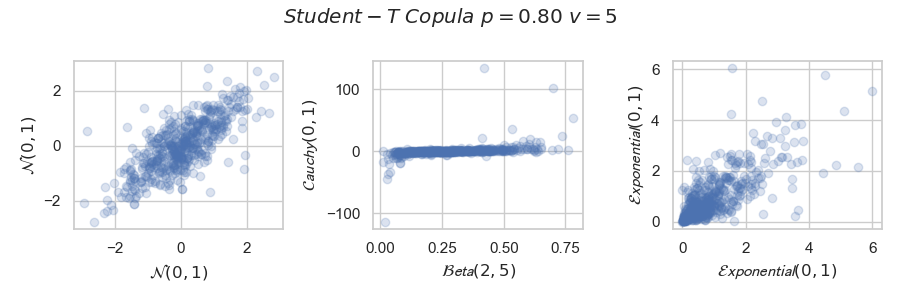

In [6]:
H1 = np.empty_like(U_StudentT)
H1[:,0] = norm.ppf(U_StudentT[:,0]); H1[:,1] = norm.ppf(U_StudentT[:,1]); 

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.scatter(H1[:,0], H1[:,1], alpha=0.2)
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')

H2 = np.empty_like(U_StudentT)
H2[:,0] = beta.ppf(U_StudentT[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_StudentT[:,1]); 

plt.subplot(1,3,2)
plt.scatter(H2[:,0], H2[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')

H3 = np.empty_like(U_StudentT)
H3[:,0] = expon.ppf(U_StudentT[:,0]); H3[:,1] = expon.ppf(U_StudentT[:,1]); 

plt.subplot(1,3,3)
plt.scatter(H3[:,0], H3[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Exponential}(0,1)$')
plt.ylabel('$\mathcal{Exponential}(0,1)$')

plt.suptitle('$Student-T\ Copula \ p=%0.02f\ v=%d$' % (P[0,1],nu))

plt.tight_layout()

### Archimedean Copulas

$$ C(u,v) = \phi^{[-1]}(\phi(u) + \phi(v)) $$
$$ \phi: [0, \infty] \rightarrow [0, 1] $$
$$ \phi^{[-1]}(t) = 
\begin{cases}
\phi^{(-1)}, 0 \leq t \leq \phi(0) \\
0, \phi(0) \leq t < \infty
\end{cases}
$$

### Clayton Copula

$$ \phi(t) = \frac{1}{\alpha}(t^{-\alpha} -1), \alpha \in [-1, \infty)/\{0\}$$
$$ \phi^{[-1]}(t) = (\alpha t + 1 )^{-1/\alpha} $$
$$ C(u,v) = (u^{-\alpha} + v^{-\alpha} - 1)^{-1/\alpha} $$

In [7]:
# https://medium.com/@financialnoob/introduction-to-copulas-part-2-9de74010ed87
alpha = 6
u = np.random.rand(n)
t = np.random.rand(n)
v = ((t / u**(-alpha-1))**(-alpha/(1+alpha)) - u**(-alpha) + 1)**(-1/alpha)
U_clayton = np.vstack([u, v]).T

<IPython.core.display.Javascript object>


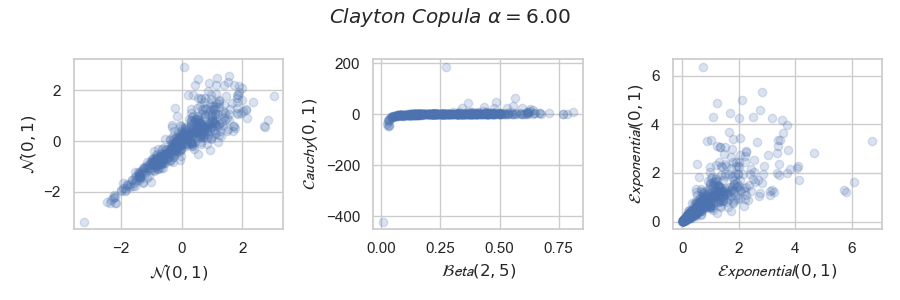

In [8]:
H1 = np.empty_like(U_clayton)
H1[:,0] = norm.ppf(U_clayton[:,0]); H1[:,1] = norm.ppf(U_clayton[:,1]); 

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.scatter(H1[:,0], H1[:,1], alpha=0.2)
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')

H2 = np.empty_like(U_clayton)
H2[:,0] = beta.ppf(U_clayton[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_clayton[:,1]); 

plt.subplot(1,3,2)
plt.scatter(H2[:,0], H2[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')

H3 = np.empty_like(U_clayton)
H3[:,0] = expon.ppf(U_clayton[:,0]); H3[:,1] = expon.ppf(U_clayton[:,1]); 

plt.subplot(1,3,3)
plt.scatter(H3[:,0], H3[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Exponential}(0,1)$')
plt.ylabel('$\mathcal{Exponential}(0,1)$')

plt.suptitle(r'$Clayton\ Copula\ \alpha=%0.02f$' % (alpha,))

plt.tight_layout()

### Gumbel Copula

$$ \phi(t) = (-\textbf{ln}t)^\alpha, \alpha \in [-1, \infty] $$
$$ \phi^{(-1)}(t) = e^{-t^{1/\alpha}} $$
$$ C(u,v) = e^{-((-\textbf{ln} u)^\alpha + (-\textbf{ln} v)^\alpha)^{1/\alpha})} $$

In [9]:
def gumbel_phi(t, alpha):
    return (-np.log(t))**alpha

def gumbel_phi_inv(t, alpha):
    return np.exp(-t**(1/alpha))

def gumbel_K(t, alpha):
    return t * (alpha - np.log(t)) / alpha
  
alpha = 6
t1 = np.random.rand(n)
t2 = np.random.rand(n)

w = []
for t in t2:
    func = lambda w: gumbel_K(w, alpha=alpha) - t
    w.append(brentq(func, 0.0000000001, 0.9999999999))
w = np.array(w).flatten()

u = gumbel_phi_inv(t1 * gumbel_phi(w, alpha=alpha), alpha=alpha)
v = gumbel_phi_inv((1-t1) * gumbel_phi(w, alpha=alpha), alpha=alpha)
U_gumbel = np.vstack([u, v]).T

<IPython.core.display.Javascript object>


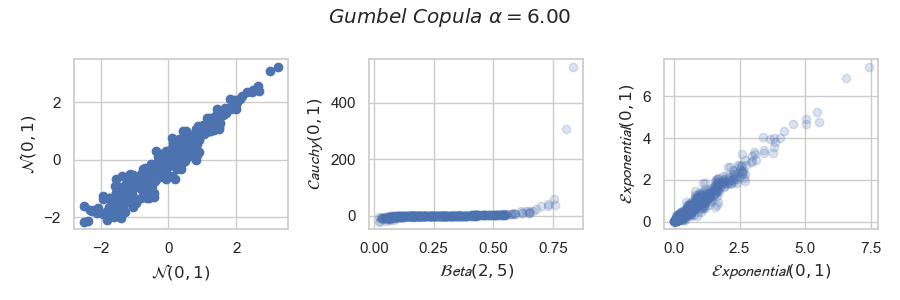

In [10]:
H1 = np.empty_like(U_gumbel)
H1[:,0] = norm.ppf(U_gumbel[:,0]); H1[:,1] = norm.ppf(U_gumbel[:,1]); 

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.scatter(H1[:,0], H1[:,1])
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')

H2 = np.empty_like(U_gumbel)
H2[:,0] = beta.ppf(U_gumbel[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_gumbel[:,1]); 

plt.subplot(1,3,2)
plt.scatter(H2[:,0], H2[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')

H3 = np.empty_like(U_gumbel)
H3[:,0] = expon.ppf(U_gumbel[:,0]); H3[:,1] = expon.ppf(U_gumbel[:,1]); 

plt.subplot(1,3,3)
plt.scatter(H3[:,0], H3[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Exponential}(0,1)$')
plt.ylabel('$\mathcal{Exponential}(0,1)$')

plt.suptitle(r'$Gumbel\ Copula\ \alpha=%0.02f$' % (alpha,))

plt.tight_layout()

### Frank Copula

$$ \phi(t) = -\textbf{ln}\left( \frac{e^{-\alpha t}-1}{e^{-\alpha}-1} \right), \alpha \in (-\infty, \infty)/\{0\} $$ 
$$ \phi^{(-1)}(t) = -\frac{1}{\alpha}\textbf{ln}\left( \frac{e^{-\alpha}-1}{e^t} + 1 \right) $$
$$ C(u,v) = -\frac{1}{\alpha} \textbf{ln} \left( 1 + \frac{(e^{-\alpha u}-1)(e^{-\alpha v}-1)}{e^{-\alpha}-1} \right) $$

In [11]:

def frank_phi(t, alpha):
    return -np.log((np.exp(-alpha*t) - 1) / (np.exp(-alpha) - 1))

def frank_phi_inv(t, alpha):
    return -1/alpha * np.log((np.exp(-alpha) - 1) / np.exp(t) + 1)

def frank_K(t, alpha):
    return (t + (1 - np.exp(alpha*t)) * np.log((1-np.exp(alpha*t)) * 
                                               np.exp(-alpha*t+alpha) / (1-np.exp(alpha))) / alpha)
  
alpha = 6
t1 = np.random.rand(n)
t2 = np.random.rand(n)

w = []
for t in t2:
    func = lambda w: frank_K(w, alpha=alpha) - t
    w.append(brentq(func, 0.0000000001, 0.9999999999))
w = np.array(w).flatten()

u = frank_phi_inv(t1 * frank_phi(w, alpha=alpha), alpha=alpha)
v = frank_phi_inv((1-t1) * frank_phi(w, alpha=alpha), alpha=alpha)
U_frank = np.vstack([u,v]).T

<IPython.core.display.Javascript object>


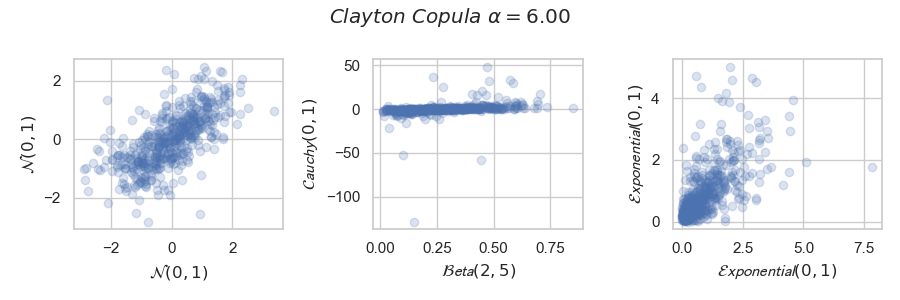

In [12]:
H1 = np.empty_like(U_frank)
H1[:,0] = norm.ppf(U_frank[:,0]); H1[:,1] = norm.ppf(U_frank[:,1]); 

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.scatter(H1[:,0], H1[:,1], alpha=0.2)
plt.xlabel('$\mathcal{N}(0,1)$')
plt.ylabel('$\mathcal{N}(0,1)$')

H2 = np.empty_like(U_frank)
H2[:,0] = beta.ppf(U_frank[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_frank[:,1]); 

plt.subplot(1,3,2)
plt.scatter(H2[:,0], H2[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Beta}(2,5)$')
plt.ylabel('$\mathcal{Cauchy}(0,1)$')

H3 = np.empty_like(U_frank)
H3[:,0] = expon.ppf(U_frank[:,0]); H3[:,1] = expon.ppf(U_frank[:,1]); 

plt.subplot(1,3,3)
plt.scatter(H3[:,0], H3[:,1], alpha=0.2)
plt.xlabel('$\mathcal{Exponential}(0,1)$')
plt.ylabel('$\mathcal{Exponential}(0,1)$')

plt.suptitle(r'$Frank\ Copula\ \alpha=%0.02f$' % (alpha,))

plt.tight_layout()

### Compare the copula samples

<IPython.core.display.Javascript object>


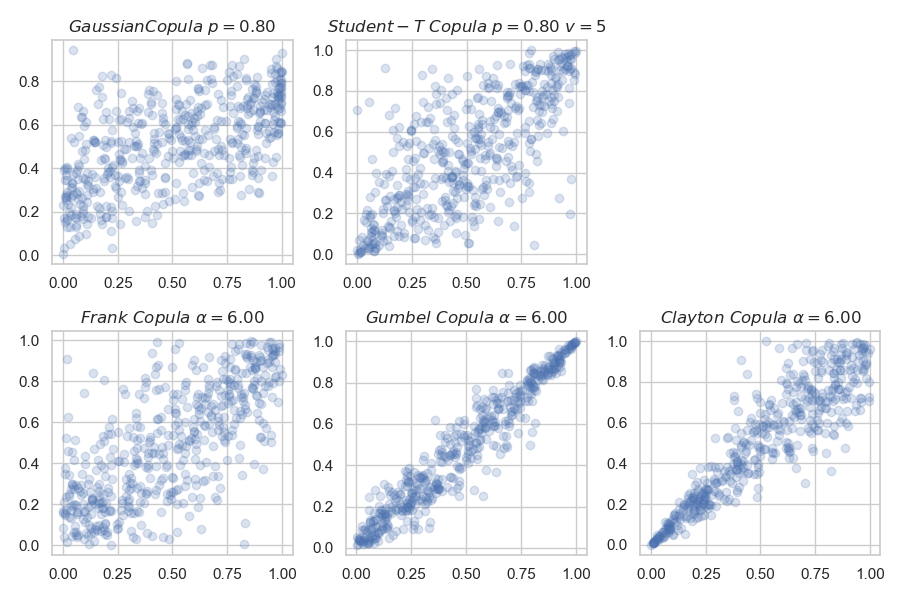

In [13]:
plt.figure(figsize=(9,6))
plt.subplot(2,3,1)
plt.scatter(U_Gauss[:,0], U_Gauss[:,1], alpha=0.2)
plt.title('$Gaussian Copula\  p=%0.02f$' % (P[0,1],))

plt.subplot(2,3,2)
plt.scatter(U_StudentT[:,0], U_StudentT[:,1], alpha=0.2)
plt.title('$Student-T\ Copula \ p=%0.02f\ v=%d$' % (P[0,1],nu))

plt.subplot(2,3,4)
plt.scatter(U_frank[:,0], U_frank[:,1], alpha=0.2)
plt.title(r'$Frank\ Copula\ \alpha=%0.02f$' % (alpha,))

plt.subplot(2,3,5)
plt.scatter(U_gumbel[:,0], U_gumbel[:,1], alpha=0.2)
plt.title(r'$Gumbel\ Copula\ \alpha=%0.02f$' % (alpha,))

plt.subplot(2,3,6)
plt.scatter(U_clayton[:,0], U_clayton[:,1], alpha=0.2)
plt.title(r'$Clayton\ Copula\ \alpha=%0.02f$' % (alpha,))

plt.tight_layout()